<a href="https://colab.research.google.com/github/ju-ing/temp_ml_study/blob/main/%ED%8F%B4%EB%8D%94%EB%AA%851/4_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

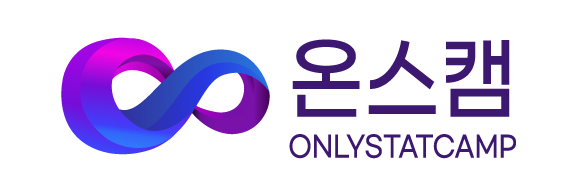

In [1]:
#@title Mount Google Drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#@title Package douwnload

!unzip -n /content/drive/MyDrive/AICover/RVC.zip -d /content
%cd /content/RVC

Archive:  /content/drive/MyDrive/AICover/RVC.zip
   creating: /content/RVC/
  inflating: /content/RVC/run.sh     
  inflating: /content/RVC/pyproject.toml  
  inflating: /content/RVC/requirements-dml.txt  
  inflating: /content/RVC/README.md  
  inflating: /content/RVC/LICENSE    
   creating: /content/RVC/.github/
   creating: /content/RVC/.github/workflows/
  inflating: /content/RVC/.github/workflows/pull_format.yml  
  inflating: /content/RVC/.github/workflows/docker.yml  
  inflating: /content/RVC/.github/workflows/genlocale.yml  
  inflating: /content/RVC/.github/workflows/unitest.yml  
  inflating: /content/RVC/.github/workflows/push_format.yml  
  inflating: /content/RVC/.github/workflows/sync_dev.yml  
  inflating: /content/RVC/.github/PULL_REQUEST_TEMPLATE.md  
  inflating: /content/RVC/infer-web.py  
  inflating: /content/RVC/.env       
   creating: /content/RVC/i18n/
  inflating: /content/RVC/i18n/i18n.py  
  inflating: /content/RVC/i18n/locale_diff.py  
   creating: /conte

In [3]:
!pip install -r requirements.txt -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.1/213.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 25.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 25.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Pre

In [5]:
#@title imoprt packages

import os
import faiss
import json
import os
import pathlib
import numpy as np
from random import shuffle
from subprocess import Popen, PIPE, STDOUT

In [6]:
# @title Create Model Folder
model_name = "PHS_AI" # @param {type:"string"}
exp_dir = model_name
dataset = "/content/drive/MyDrive/AICover/PHS/slice" # @param {type:"string"}
sample_rate = "48000" # @param ["40000", "48000"]
ksample_rate = "48k"
if sample_rate == "40000":
  ksample_rate = "40k"
else:
  ksample_rate = "48k"
version = "v2" # @param ["v1", "v2"]
version19 = version

f0method = "rmvpe_gpu" # @param ["pm", "dio", "harvest", "rmvpe", "rmvpe_gpu"]

save_frequency = 50 # @param {type:"slider", min:0, max:50, step:1}
epoch = 100 # @param {type:"integer"}
batch_size = "8" # @param {type:"string"}
cache_gpu = True # @param {type:"boolean"}

In [7]:
now_dir = "/content/RVC"

os.makedirs("%s/logs/%s" % (now_dir, model_name), exist_ok=True)
f = open("%s/logs/%s/preprocess.log" % (now_dir, model_name), "w")

os.makedirs("%s/logs/%s" % (now_dir, model_name), exist_ok=True)
f = open("%s/logs/%s/extract_f0_feature.log" % (now_dir, model_name), "w")
f.close()

In [8]:
# @title Process Data
command = f"python infer/modules/train/preprocess.py '{dataset}' {sample_rate} 2 '{now_dir}/logs/{exp_dir}' False 3.0"
print(command)
!{command}

python infer/modules/train/preprocess.py '/content/drive/MyDrive/AICover/PHS/slice' 48000 2 '/content/RVC/logs/PHS_AI' False 3.0
/content/drive/MyDrive/AICover/PHS/slice 48000 2 /content/RVC/logs/PHS_AI False 3.0
start preprocess
/content/drive/MyDrive/AICover/PHS/slice/split_1.wav	-> Success
/content/drive/MyDrive/AICover/PHS/slice/split_0.wav	-> Success
/content/drive/MyDrive/AICover/PHS/slice/split_10.wav	-> Success
/content/drive/MyDrive/AICover/PHS/slice/split_12.wav	-> Success
/content/drive/MyDrive/AICover/PHS/slice/split_11.wav	-> Success
/content/drive/MyDrive/AICover/PHS/slice/split_14.wav	-> Success
/content/drive/MyDrive/AICover/PHS/slice/split_16.wav	-> Success
/content/drive/MyDrive/AICover/PHS/slice/split_18.wav	-> Success
/content/drive/MyDrive/AICover/PHS/slice/split_2.wav	-> Success
/content/drive/MyDrive/AICover/PHS/slice/split_13.wav	-> Success
/content/drive/MyDrive/AICover/PHS/slice/split_21.wav	-> Success
/content/drive/MyDrive/AICover/PHS/slice/split_15.wav	-> S

In [9]:
# @title Feature Extraction

if f0method != "rmvpe_gpu":
  command = f"python infer/modules/train/extract/extract_f0_print.py '{now_dir}/logs/{exp_dir}' 2 '{f0method}'"
else:
  command = f"python infer/modules/train/extract/extract_f0_rmvpe.py 1 0 0 '{now_dir}/logs/{exp_dir}' True"
print(command)
!{command}

command = f"python infer/modules/train/extract_feature_print.py cuda:0 1 0 0 '{now_dir}/logs/{exp_dir}' '{version}' False"
print(command)
!{command}

python infer/modules/train/extract/extract_f0_rmvpe.py 1 0 0 '/content/RVC/logs/PHS_AI' True
infer/modules/train/extract/extract_f0_rmvpe.py 1 0 0 /content/RVC/logs/PHS_AI True
todo-f0-491
f0ing,now-0,all-491,-/content/RVC/logs/PHS_AI/1_16k_wavs/0_0.wav
Loading rmvpe model
f0ing,now-98,all-491,-/content/RVC/logs/PHS_AI/1_16k_wavs/26_40.wav
f0ing,now-196,all-491,-/content/RVC/logs/PHS_AI/1_16k_wavs/42_0.wav
f0ing,now-294,all-491,-/content/RVC/logs/PHS_AI/1_16k_wavs/51_2.wav
f0ing,now-392,all-491,-/content/RVC/logs/PHS_AI/1_16k_wavs/61_0.wav
f0ing,now-490,all-491,-/content/RVC/logs/PHS_AI/1_16k_wavs/9_3.wav
python infer/modules/train/extract_feature_print.py cuda:0 1 0 0 '/content/RVC/logs/PHS_AI' 'v2' False
2024-07-06 07:08:23.901557: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-06 07:08:23.901625: E external/local_xla/xla/stream_executor/cuda

In [ ]:
# @title Train Feature Index

def train_index(exp_dir1, version19):
    exp_dir = "logs/%s" % (exp_dir1)
    os.makedirs(exp_dir, exist_ok=True)
    feature_dir = (
        "%s/3_feature256" % (exp_dir)
        if version19 == "v1"
        else "%s/3_feature768" % (exp_dir)
    )
    if not os.path.exists(feature_dir):
        return "请先进行特征提取!"
    listdir_res = list(os.listdir(feature_dir))
    if len(listdir_res) == 0:
        return "请先进行特征提取！"
    infos = []
    npys = []
    for name in sorted(listdir_res):
        phone = np.load("%s/%s" % (feature_dir, name))
        npys.append(phone)
    big_npy = np.concatenate(npys, 0)
    big_npy_idx = np.arange(big_npy.shape[0])
    np.random.shuffle(big_npy_idx)
    big_npy = big_npy[big_npy_idx]
    if big_npy.shape[0] > 2e5:
        infos.append("Trying doing kmeans %s shape to 10k centers." % big_npy.shape[0])
        yield "\n".join(infos)
        try:
            big_npy = (
                MiniBatchKMeans(
                    n_clusters=10000,
                    verbose=True,
                    batch_size=256 * config.n_cpu,
                    compute_labels=False,
                    init="random",
                )
                .fit(big_npy)
                .cluster_centers_
            )
        except:
            info = traceback.format_exc()
            logger.info(info)
            infos.append(info)
            yield "\n".join(infos)

    np.save("%s/total_fea.npy" % exp_dir, big_npy)
    n_ivf = min(int(16 * np.sqrt(big_npy.shape[0])), big_npy.shape[0] // 39)
    infos.append("%s,%s" % (big_npy.shape, n_ivf))
    yield "\n".join(infos)
    index = faiss.index_factory(256 if version19 == "v1" else 768, "IVF%s,Flat" % n_ivf)
    # index = faiss.index_factory(256if version19=="v1"else 768, "IVF%s,PQ128x4fs,RFlat"%n_ivf)
    infos.append("training")
    yield "\n".join(infos)
    index_ivf = faiss.extract_index_ivf(index)  #
    index_ivf.nprobe = 1
    index.train(big_npy)
    faiss.write_index(
        index,
        "%s/trained_IVF%s_Flat_nprobe_%s_%s_%s.index"
        % (exp_dir, n_ivf, index_ivf.nprobe, exp_dir1, version19),
    )

    infos.append("adding")
    yield "\n".join(infos)
    batch_size_add = 8192
    for i in range(0, big_npy.shape[0], batch_size_add):
        index.add(big_npy[i : i + batch_size_add])
    faiss.write_index(
        index,
        "%s/added_IVF%s_Flat_nprobe_%s_%s_%s.index"
        % (exp_dir, n_ivf, index_ivf.nprobe, exp_dir1, version19),
    )
    infos.append(
        "成功构建索引，added_IVF%s_Flat_nprobe_%s_%s_%s.index"
        % (n_ivf, index_ivf.nprobe, exp_dir1, version19)
    )

In [ ]:
result_generator = train_index(exp_dir, version)

In [ ]:
for result in result_generator:
    print(result)

(57813, 768),1482
(57813, 768),1482
training
(57813, 768),1482
training
adding


In [ ]:
def click_train(
    exp_dir1,
    sr2,
    if_f0_3,
    spk_id5,
    save_epoch10,
    total_epoch11,
    batch_size12,
    if_save_latest13,
    pretrained_G14,
    pretrained_D15,
    gpus16,
    if_cache_gpu17,
    if_save_every_weights18,
    version19,
):
    # 生成filelist
    exp_dir = "%s/logs/%s" % (now_dir, exp_dir1)
    os.makedirs(exp_dir, exist_ok=True)
    gt_wavs_dir = "%s/0_gt_wavs" % (exp_dir)
    feature_dir = (
        "%s/3_feature256" % (exp_dir)
        if version19 == "v1"
        else "%s/3_feature768" % (exp_dir)
    )
    if if_f0_3:
        f0_dir = "%s/2a_f0" % (exp_dir)
        f0nsf_dir = "%s/2b-f0nsf" % (exp_dir)
        names = (
            set([name.split(".")[0] for name in os.listdir(gt_wavs_dir)])
            & set([name.split(".")[0] for name in os.listdir(feature_dir)])
            & set([name.split(".")[0] for name in os.listdir(f0_dir)])
            & set([name.split(".")[0] for name in os.listdir(f0nsf_dir)])
        )
    else:
        names = set([name.split(".")[0] for name in os.listdir(gt_wavs_dir)]) & set(
            [name.split(".")[0] for name in os.listdir(feature_dir)]
        )
    opt = []
    for name in names:
        if if_f0_3:
            opt.append(
                "%s/%s.wav|%s/%s.npy|%s/%s.wav.npy|%s/%s.wav.npy|%s"
                % (
                    gt_wavs_dir.replace("\\", "\\\\"),
                    name,
                    feature_dir.replace("\\", "\\\\"),
                    name,
                    f0_dir.replace("\\", "\\\\"),
                    name,
                    f0nsf_dir.replace("\\", "\\\\"),
                    name,
                    spk_id5,
                )
            )
        else:
            opt.append(
                "%s/%s.wav|%s/%s.npy|%s"
                % (
                    gt_wavs_dir.replace("\\", "\\\\"),
                    name,
                    feature_dir.replace("\\", "\\\\"),
                    name,
                    spk_id5,
                )
            )
    fea_dim = 256 if version19 == "v1" else 768
    if if_f0_3:
        for _ in range(2):
            opt.append(
                "%s/logs/mute/0_gt_wavs/mute%s.wav|%s/logs/mute/3_feature%s/mute.npy|%s/logs/mute/2a_f0/mute.wav.npy|%s/logs/mute/2b-f0nsf/mute.wav.npy|%s"
                % (now_dir, sr2, now_dir, fea_dim, now_dir, now_dir, spk_id5)
            )
    else:
        for _ in range(2):
            opt.append(
                "%s/logs/mute/0_gt_wavs/mute%s.wav|%s/logs/mute/3_feature%s/mute.npy|%s"
                % (now_dir, sr2, now_dir, fea_dim, spk_id5)
            )
    shuffle(opt)
    with open("%s/filelist.txt" % exp_dir, "w") as f:
        f.write("\n".join(opt))

    # Replace logger.debug, logger.info with print statements
    print("Write filelist done")
    print("Use gpus:", str(gpus16))
    if pretrained_G14 == "":
        print("No pretrained Generator")
    if pretrained_D15 == "":
        print("No pretrained Discriminator")
    if version19 == "v1" or sr2 == "40k":
        config_path = "configs/v1/%s.json" % sr2
    else:
        config_path = "configs/v2/%s.json" % sr2
    config_save_path = os.path.join(exp_dir, "config.json")
    if not pathlib.Path(config_save_path).exists():
        with open(config_save_path, "w", encoding="utf-8") as f:
            with open(config_path, "r") as config_file:
                config_data = json.load(config_file)
                json.dump(
                    config_data,
                    f,
                    ensure_ascii=False,
                    indent=4,
                    sort_keys=True,
                )
            f.write("\n")

    cmd = (
        'python infer/modules/train/train.py -e "%s" -sr %s -f0 %s -bs %s -g %s -te %s -se %s %s %s -l %s -c %s -sw %s -v %s'
        % (
            exp_dir1,
            sr2,
            1 if if_f0_3 else 0,
            batch_size12,
            gpus16,
            total_epoch11,
            save_epoch10,
            "-pg %s" % pretrained_G14 if pretrained_G14 != "" else "",
            "-pd %s" % pretrained_D15 if pretrained_D15 != "" else "",
            1 if if_save_latest13 == True else 0,
            1 if if_cache_gpu17 == True else 0,
            1 if if_save_every_weights18 == True else 0,
            version19,
        )
    )
    # Use PIPE to capture the output and error streams
    p = Popen(cmd, shell=True, cwd=now_dir, stdout=PIPE, stderr=STDOUT, bufsize=1, universal_newlines=True)

    # Print the command's output as it runs
    for line in p.stdout:
        print(line.strip())

    # Wait for the process to finish
    p.wait()
    return "train.log"

In [ ]:
if version == 'v1':
    if ksample_rate == '40k':
        G_path = 'assets/pretrained/f0G40k.pth'
        D_path = 'assets/pretrained/f0D40k.pth'
    elif ksample_rate == '48k':
        G_path = 'assets/pretrained/f0G48k.pth'
        D_path = 'assets/pretrained/f0D48k.pth'
elif version == 'v2':
    if ksample_rate == '40k':
        G_path = 'assets/pretrained_v2/f0G40k.pth'
        D_path = 'assets/pretrained_v2/f0D40k.pth'
    elif ksample_rate == '48k':
        G_path = 'assets/pretrained_v2/f0G48k.pth'
        D_path = 'assets/pretrained_v2/f0D48k.pth'

In [ ]:
# @title Train Model

result_generator = click_train(
    exp_dir,
    ksample_rate,
    True,
    0,
    save_frequency,
    epoch,
    batch_size,
    True,
    G_path,
    D_path,
    0,
    cache_gpu,
    False,
    version,
)
print(result_generator)

Write filelist done
Use gpus: 0
2024-06-19 13:32:10.871860: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-19 13:32:10.872108: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-19 13:32:10.876467: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-19 13:32:10.892119: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
DEBUG:tensorf

In [ ]:
#@title Copy Training Result to Drive
!mkdir -p /content/drive/MyDrive/AICover/{exp_dir}

In [ ]:
!cp /content/RVC/logs/{exp_dir}/added_*.index /content/drive/MyDrive/AICover/{exp_dir}
!cp /content/RVC/logs/{exp_dir}/total_*.npy /content/drive/MyDrive/AICover/{exp_dir}
!cp /content/RVC/assets/weights/{exp_dir}.pth /content/drive/MyDrive/AICover/{exp_dir}

In [ ]:
%cd /content/drive/MyDrive/AICover/{exp_dir}
!zip {exp_dir}.zip added_*.index total_*.npy {exp_dir}.pth

/content/drive/MyDrive/AICover/Yerin_Baek
updating: Yerin_Baek.pth (deflated 8%)
  adding: added_IVF1482_Flat_nprobe_1_Yerin_Baek_v2.index (deflated 7%)
  adding: total_fea.npy (deflated 7%)


In [ ]:
%cd /content/RVC

/content/RVC


In [ ]:
from google.colab import runtime
runtime.unassign()

---

```sh
Write filelist done
Use gpus: 0
2024-06-19 13:32:10.871860: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-19 13:32:10.872108: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-19 13:32:10.876467: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-19 13:32:10.892119: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
DEBUG:tensorflow:Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.
2024-06-19 13:32:12.208086: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:jax._src.path:etils.epath found. Using etils.epath for file I/O.
INFO:numexpr.utils:NumExpr defaulting to 2 threads.
2024-06-19 13:32:16.461157: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-19 13:32:16.461214: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-19 13:32:16.462949: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
DEBUG:tensorflow:Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.
2024-06-19 13:32:17.535492: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:jax._src.path:etils.epath found. Using etils.epath for file I/O.
INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:Yerin_Baek:{'data': {'filter_length': 2048, 'hop_length': 480, 'max_wav_value': 32768.0, 'mel_fmax': None, 'mel_fmin': 0.0, 'n_mel_channels': 128, 'sampling_rate': 48000, 'win_length': 2048, 'training_files': './logs/Yerin_Baek/filelist.txt'}, 'model': {'filter_channels': 768, 'gin_channels': 256, 'hidden_channels': 192, 'inter_channels': 192, 'kernel_size': 3, 'n_heads': 2, 'n_layers': 6, 'p_dropout': 0, 'resblock': '1', 'resblock_dilation_sizes': [[1, 3, 5], [1, 3, 5], [1, 3, 5]], 'resblock_kernel_sizes': [3, 7, 11], 'spk_embed_dim': 109, 'upsample_initial_channel': 512, 'upsample_kernel_sizes': [24, 20, 4, 4], 'upsample_rates': [12, 10, 2, 2], 'use_spectral_norm': False}, 'train': {'batch_size': 8, 'betas': [0.8, 0.99], 'c_kl': 1.0, 'c_mel': 45, 'epochs': 20000, 'eps': 1e-09, 'fp16_run': True, 'init_lr_ratio': 1, 'learning_rate': 0.0001, 'log_interval': 200, 'lr_decay': 0.999875, 'seed': 1234, 'segment_size': 17280, 'warmup_epochs': 0}, 'model_dir': './logs/Yerin_Baek', 'experiment_dir': './logs/Yerin_Baek', 'save_every_epoch': 50, 'name': 'Yerin_Baek', 'total_epoch': 100, 'pretrainG': 'assets/pretrained_v2/f0G48k.pth', 'pretrainD': 'assets/pretrained_v2/f0D48k.pth', 'version': 'v2', 'gpus': '0', 'sample_rate': '48k', 'if_f0': 1, 'if_latest': 1, 'save_every_weights': '0', 'if_cache_data_in_gpu': 1}
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
DEBUG:infer.lib.infer_pack.models:gin_channels: 256, self.spk_embed_dim: 109
INFO:Yerin_Baek:loaded pretrained assets/pretrained_v2/f0G48k.pth
INFO:Yerin_Baek:<All keys matched successfully>
INFO:Yerin_Baek:loaded pretrained assets/pretrained_v2/f0D48k.pth
INFO:Yerin_Baek:<All keys matched successfully>
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
warnings.warn(_create_warning_msg(
2024-06-19 13:32:27.572327: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-19 13:32:27.572377: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-19 13:32:27.573985: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
DEBUG:tensorflow:Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.
2024-06-19 13:32:28.663160: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:jax._src.path:etils.epath found. Using etils.epath for file I/O.
INFO:numexpr.utils:NumExpr defaulting to 2 threads.
2024-06-19 13:32:32.638941: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-19 13:32:32.638989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-19 13:32:32.640590: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
DEBUG:tensorflow:Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.
2024-06-19 13:32:33.733096: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:jax._src.path:etils.epath found. Using etils.epath for file I/O.
INFO:numexpr.utils:NumExpr defaulting to 2 threads.
2024-06-19 13:32:38.411530: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-19 13:32:38.412424: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-19 13:32:38.414475: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
DEBUG:tensorflow:Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.
2024-06-19 13:32:40.014968: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:jax._src.path:etils.epath found. Using etils.epath for file I/O.
INFO:numexpr.utils:NumExpr defaulting to 2 threads.
2024-06-19 13:32:45.332422: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-19 13:32:45.333292: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-19 13:32:45.335419: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
DEBUG:tensorflow:Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.
2024-06-19 13:32:46.483585: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:jax._src.path:etils.epath found. Using etils.epath for file I/O.
INFO:numexpr.utils:NumExpr defaulting to 2 threads.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
return F.conv1d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Grad strides do not match bucket view strides. This may indicate grad was not created according to the gradient layout contract, or that the param's strides changed since DDP was constructed.  This is not an error, but may impair performance.
grad.sizes() = [64, 1, 4], strides() = [4, 1, 1]
bucket_view.sizes() = [64, 1, 4], strides() = [4, 4, 1] (Triggered internally at ../torch/csrc/distributed/c10d/reducer.cpp:325.)
return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
INFO:Yerin_Baek:Train Epoch: 1 [0%]
INFO:Yerin_Baek:[0, 0.0001]
INFO:Yerin_Baek:loss_disc=4.161, loss_gen=3.045, loss_fm=14.065,loss_mel=35.296, loss_kl=9.000
DEBUG:matplotlib:matplotlib data path: /usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/root/.config/matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
INFO:Yerin_Baek:====> Epoch: 1 [2024-06-19 13:33:47] | (0:00:45.634411)
INFO:Yerin_Baek:====> Epoch: 2 [2024-06-19 13:34:26] | (0:00:39.534922)
INFO:Yerin_Baek:====> Epoch: 3 [2024-06-19 13:35:05] | (0:00:38.325157)
INFO:Yerin_Baek:Train Epoch: 4 [31%]
INFO:Yerin_Baek:[200, 9.996250468730469e-05]
INFO:Yerin_Baek:loss_disc=3.593, loss_gen=4.089, loss_fm=16.466,loss_mel=25.158, loss_kl=1.978
INFO:Yerin_Baek:====> Epoch: 4 [2024-06-19 13:35:45] | (0:00:40.037190)
INFO:Yerin_Baek:====> Epoch: 5 [2024-06-19 13:36:23] | (0:00:38.067244)
INFO:Yerin_Baek:====> Epoch: 6 [2024-06-19 13:37:01] | (0:00:38.007819)
INFO:Yerin_Baek:====> Epoch: 7 [2024-06-19 13:37:39] | (0:00:38.204091)
INFO:Yerin_Baek:Train Epoch: 8 [9%]
INFO:Yerin_Baek:[400, 9.991253280566489e-05]
INFO:Yerin_Baek:loss_disc=3.602, loss_gen=3.782, loss_fm=13.714,loss_mel=24.437, loss_kl=1.744
INFO:Yerin_Baek:====> Epoch: 8 [2024-06-19 13:38:18] | (0:00:38.646428)
INFO:Yerin_Baek:====> Epoch: 9 [2024-06-19 13:38:56] | (0:00:37.994626)
INFO:Yerin_Baek:====> Epoch: 10 [2024-06-19 13:39:34] | (0:00:38.089564)
INFO:Yerin_Baek:Train Epoch: 11 [27%]
INFO:Yerin_Baek:[600, 9.987507028906759e-05]
INFO:Yerin_Baek:loss_disc=3.779, loss_gen=3.801, loss_fm=13.322,loss_mel=24.021, loss_kl=1.496
INFO:Yerin_Baek:====> Epoch: 11 [2024-06-19 13:40:12] | (0:00:38.596034)
INFO:Yerin_Baek:====> Epoch: 12 [2024-06-19 13:40:50] | (0:00:38.094133)
INFO:Yerin_Baek:====> Epoch: 13 [2024-06-19 13:41:28] | (0:00:37.933819)
INFO:Yerin_Baek:====> Epoch: 14 [2024-06-19 13:42:06] | (0:00:37.963498)
INFO:Yerin_Baek:Train Epoch: 15 [22%]
INFO:Yerin_Baek:[800, 9.982514211643064e-05]
INFO:Yerin_Baek:loss_disc=3.682, loss_gen=3.706, loss_fm=12.537,loss_mel=24.030, loss_kl=1.274
INFO:Yerin_Baek:====> Epoch: 15 [2024-06-19 13:42:45] | (0:00:39.108362)
INFO:Yerin_Baek:====> Epoch: 16 [2024-06-19 13:43:24] | (0:00:38.309083)
INFO:Yerin_Baek:====> Epoch: 17 [2024-06-19 13:44:02] | (0:00:38.063809)
INFO:Yerin_Baek:====> Epoch: 18 [2024-06-19 13:44:40] | (0:00:37.967709)
INFO:Yerin_Baek:Train Epoch: 19 [35%]
INFO:Yerin_Baek:[1000, 9.977523890319963e-05]
INFO:Yerin_Baek:loss_disc=3.533, loss_gen=4.203, loss_fm=15.135,loss_mel=22.741, loss_kl=1.734
INFO:Yerin_Baek:====> Epoch: 19 [2024-06-19 13:45:19] | (0:00:39.464388)
INFO:Yerin_Baek:====> Epoch: 20 [2024-06-19 13:45:58] | (0:00:38.293579)
INFO:Yerin_Baek:====> Epoch: 21 [2024-06-19 13:46:36] | (0:00:38.123572)
INFO:Yerin_Baek:Train Epoch: 22 [89%]
INFO:Yerin_Baek:[1200, 9.973782786538036e-05]
INFO:Yerin_Baek:loss_disc=3.590, loss_gen=3.923, loss_fm=14.462,loss_mel=22.229, loss_kl=1.226
INFO:Yerin_Baek:====> Epoch: 22 [2024-06-19 13:47:14] | (0:00:38.651126)
INFO:Yerin_Baek:====> Epoch: 23 [2024-06-19 13:47:52] | (0:00:38.086737)
INFO:Yerin_Baek:====> Epoch: 24 [2024-06-19 13:48:31] | (0:00:38.240528)
INFO:Yerin_Baek:====> Epoch: 25 [2024-06-19 13:49:09] | (0:00:38.025090)
INFO:Yerin_Baek:Train Epoch: 26 [67%]
INFO:Yerin_Baek:[1400, 9.968796830108985e-05]
INFO:Yerin_Baek:loss_disc=3.188, loss_gen=4.159, loss_fm=15.365,loss_mel=23.341, loss_kl=1.533
INFO:Yerin_Baek:====> Epoch: 26 [2024-06-19 13:49:48] | (0:00:38.866216)
INFO:Yerin_Baek:====> Epoch: 27 [2024-06-19 13:50:26] | (0:00:38.185443)
INFO:Yerin_Baek:====> Epoch: 28 [2024-06-19 13:51:04] | (0:00:38.122429)
INFO:Yerin_Baek:====> Epoch: 29 [2024-06-19 13:51:42] | (0:00:38.018532)
INFO:Yerin_Baek:Train Epoch: 30 [7%]
INFO:Yerin_Baek:[1600, 9.963813366190753e-05]
INFO:Yerin_Baek:loss_disc=3.323, loss_gen=3.857, loss_fm=12.499,loss_mel=22.949, loss_kl=1.366
INFO:Yerin_Baek:====> Epoch: 30 [2024-06-19 13:52:21] | (0:00:39.023980)
INFO:Yerin_Baek:====> Epoch: 31 [2024-06-19 13:52:59] | (0:00:38.218103)
INFO:Yerin_Baek:====> Epoch: 32 [2024-06-19 13:53:37] | (0:00:38.058331)
INFO:Yerin_Baek:Train Epoch: 33 [4%]
INFO:Yerin_Baek:[1800, 9.960077403212722e-05]
INFO:Yerin_Baek:loss_disc=3.546, loss_gen=3.684, loss_fm=10.415,loss_mel=22.312, loss_kl=0.951
INFO:Yerin_Baek:====> Epoch: 33 [2024-06-19 13:54:17] | (0:00:39.428159)
INFO:Yerin_Baek:====> Epoch: 34 [2024-06-19 13:54:55] | (0:00:37.989418)
INFO:Yerin_Baek:====> Epoch: 35 [2024-06-19 13:55:33] | (0:00:38.284496)
INFO:Yerin_Baek:====> Epoch: 36 [2024-06-19 13:56:11] | (0:00:38.375136)
INFO:Yerin_Baek:Train Epoch: 37 [40%]
INFO:Yerin_Baek:[2000, 9.95509829819056e-05]
INFO:Yerin_Baek:loss_disc=3.469, loss_gen=3.650, loss_fm=14.211,loss_mel=23.252, loss_kl=1.473
INFO:Yerin_Baek:====> Epoch: 37 [2024-06-19 13:56:50] | (0:00:38.535649)
INFO:Yerin_Baek:====> Epoch: 38 [2024-06-19 13:57:28] | (0:00:37.852307)
INFO:Yerin_Baek:====> Epoch: 39 [2024-06-19 13:58:06] | (0:00:37.997737)
INFO:Yerin_Baek:====> Epoch: 40 [2024-06-19 13:58:44] | (0:00:37.999861)
INFO:Yerin_Baek:Train Epoch: 41 [84%]
INFO:Yerin_Baek:[2200, 9.950121682254156e-05]
INFO:Yerin_Baek:loss_disc=3.380, loss_gen=4.029, loss_fm=8.914,loss_mel=22.627, loss_kl=0.791
INFO:Yerin_Baek:====> Epoch: 41 [2024-06-19 13:59:22] | (0:00:38.470196)
INFO:Yerin_Baek:====> Epoch: 42 [2024-06-19 14:00:00] | (0:00:38.062107)
INFO:Yerin_Baek:====> Epoch: 43 [2024-06-19 14:00:38] | (0:00:37.985018)
INFO:Yerin_Baek:Train Epoch: 44 [75%]
INFO:Yerin_Baek:[2400, 9.94639085301583e-05]
INFO:Yerin_Baek:loss_disc=3.404, loss_gen=3.928, loss_fm=14.443,loss_mel=22.509, loss_kl=1.274
INFO:Yerin_Baek:====> Epoch: 44 [2024-06-19 14:01:17] | (0:00:38.796773)
INFO:Yerin_Baek:====> Epoch: 45 [2024-06-19 14:01:55] | (0:00:38.214736)
INFO:Yerin_Baek:====> Epoch: 46 [2024-06-19 14:02:36] | (0:00:40.849028)
INFO:Yerin_Baek:====> Epoch: 47 [2024-06-19 14:03:19] | (0:00:43.270333)
INFO:Yerin_Baek:Train Epoch: 48 [64%]
INFO:Yerin_Baek:[2600, 9.941418589985758e-05]
INFO:Yerin_Baek:loss_disc=3.354, loss_gen=4.100, loss_fm=16.314,loss_mel=22.531, loss_kl=1.341
INFO:Yerin_Baek:====> Epoch: 48 [2024-06-19 14:03:59] | (0:00:39.277385)
INFO:Yerin_Baek:====> Epoch: 49 [2024-06-19 14:04:38] | (0:00:39.273825)
INFO:root:Saving model and optimizer state at epoch 50 to ./logs/Yerin_Baek/G_2333333.pth
INFO:root:Saving model and optimizer state at epoch 50 to ./logs/Yerin_Baek/D_2333333.pth
INFO:Yerin_Baek:====> Epoch: 50 [2024-06-19 14:05:34] | (0:00:56.122089)
INFO:Yerin_Baek:Train Epoch: 51 [82%]
INFO:Yerin_Baek:[2800, 9.937691023999092e-05]
INFO:Yerin_Baek:loss_disc=3.241, loss_gen=4.038, loss_fm=14.466,loss_mel=21.313, loss_kl=1.036
INFO:Yerin_Baek:====> Epoch: 51 [2024-06-19 14:06:14] | (0:00:39.772275)
INFO:Yerin_Baek:====> Epoch: 52 [2024-06-19 14:06:52] | (0:00:38.373420)
INFO:Yerin_Baek:====> Epoch: 53 [2024-06-19 14:07:31] | (0:00:38.261489)
INFO:Yerin_Baek:====> Epoch: 54 [2024-06-19 14:08:09] | (0:00:38.300301)
INFO:Yerin_Baek:Train Epoch: 55 [87%]
INFO:Yerin_Baek:[3000, 9.932723110067987e-05]
INFO:Yerin_Baek:loss_disc=3.134, loss_gen=4.491, loss_fm=18.915,loss_mel=22.932, loss_kl=1.187
INFO:Yerin_Baek:====> Epoch: 55 [2024-06-19 14:08:48] | (0:00:39.022370)
INFO:Yerin_Baek:====> Epoch: 56 [2024-06-19 14:09:27] | (0:00:38.522748)
INFO:Yerin_Baek:====> Epoch: 57 [2024-06-19 14:10:05] | (0:00:38.321644)
INFO:Yerin_Baek:====> Epoch: 58 [2024-06-19 14:10:43] | (0:00:38.344290)
INFO:Yerin_Baek:Train Epoch: 59 [53%]
INFO:Yerin_Baek:[3200, 9.927757679628145e-05]
INFO:Yerin_Baek:loss_disc=3.598, loss_gen=3.990, loss_fm=13.828,loss_mel=21.218, loss_kl=0.900
INFO:Yerin_Baek:====> Epoch: 59 [2024-06-19 14:11:22] | (0:00:38.904840)
INFO:Yerin_Baek:====> Epoch: 60 [2024-06-19 14:12:00] | (0:00:38.036854)
INFO:Yerin_Baek:====> Epoch: 61 [2024-06-19 14:12:38] | (0:00:38.287757)
INFO:Yerin_Baek:Train Epoch: 62 [7%]
INFO:Yerin_Baek:[3400, 9.924035235842533e-05]
INFO:Yerin_Baek:loss_disc=3.197, loss_gen=3.914, loss_fm=12.430,loss_mel=21.346, loss_kl=1.441
INFO:Yerin_Baek:====> Epoch: 62 [2024-06-19 14:13:18] | (0:00:39.635917)
INFO:Yerin_Baek:====> Epoch: 63 [2024-06-19 14:13:56] | (0:00:38.409283)
INFO:Yerin_Baek:====> Epoch: 64 [2024-06-19 14:14:35] | (0:00:38.260091)
INFO:Yerin_Baek:====> Epoch: 65 [2024-06-19 14:15:13] | (0:00:38.629858)
INFO:Yerin_Baek:Train Epoch: 66 [24%]
INFO:Yerin_Baek:[3600, 9.919074148525384e-05]
INFO:Yerin_Baek:loss_disc=3.654, loss_gen=4.120, loss_fm=15.167,loss_mel=21.556, loss_kl=1.082
INFO:Yerin_Baek:====> Epoch: 66 [2024-06-19 14:15:53] | (0:00:39.434565)
INFO:Yerin_Baek:====> Epoch: 67 [2024-06-19 14:16:31] | (0:00:37.972385)
INFO:Yerin_Baek:====> Epoch: 68 [2024-06-19 14:17:09] | (0:00:38.009951)
INFO:Yerin_Baek:====> Epoch: 69 [2024-06-19 14:17:47] | (0:00:38.041339)
INFO:Yerin_Baek:Train Epoch: 70 [4%]
INFO:Yerin_Baek:[3800, 9.914115541286833e-05]
INFO:Yerin_Baek:loss_disc=3.777, loss_gen=3.521, loss_fm=11.077,loss_mel=21.142, loss_kl=1.069
INFO:Yerin_Baek:====> Epoch: 70 [2024-06-19 14:18:25] | (0:00:38.545862)
INFO:Yerin_Baek:====> Epoch: 71 [2024-06-19 14:19:03] | (0:00:37.940279)
INFO:Yerin_Baek:====> Epoch: 72 [2024-06-19 14:19:41] | (0:00:37.735651)
INFO:Yerin_Baek:Train Epoch: 73 [20%]
INFO:Yerin_Baek:[4000, 9.910398212663652e-05]
INFO:Yerin_Baek:loss_disc=3.619, loss_gen=3.799, loss_fm=13.958,loss_mel=20.887, loss_kl=1.142
INFO:Yerin_Baek:====> Epoch: 73 [2024-06-19 14:20:20] | (0:00:38.436861)
INFO:Yerin_Baek:====> Epoch: 74 [2024-06-19 14:20:57] | (0:00:37.759222)
INFO:Yerin_Baek:====> Epoch: 75 [2024-06-19 14:21:35] | (0:00:37.941893)
INFO:Yerin_Baek:====> Epoch: 76 [2024-06-19 14:22:13] | (0:00:37.886513)
INFO:Yerin_Baek:Train Epoch: 77 [45%]
INFO:Yerin_Baek:[4200, 9.905443942579728e-05]
INFO:Yerin_Baek:loss_disc=3.632, loss_gen=4.072, loss_fm=12.690,loss_mel=22.501, loss_kl=0.676
INFO:Yerin_Baek:====> Epoch: 77 [2024-06-19 14:22:52] | (0:00:38.627962)
INFO:Yerin_Baek:====> Epoch: 78 [2024-06-19 14:23:29] | (0:00:37.640107)
INFO:Yerin_Baek:====> Epoch: 79 [2024-06-19 14:24:07] | (0:00:37.545334)
INFO:Yerin_Baek:====> Epoch: 80 [2024-06-19 14:24:45] | (0:00:37.672656)
INFO:Yerin_Baek:Train Epoch: 81 [25%]
INFO:Yerin_Baek:[4400, 9.900492149166423e-05]
INFO:Yerin_Baek:loss_disc=3.527, loss_gen=3.507, loss_fm=14.031,loss_mel=21.059, loss_kl=0.465
INFO:Yerin_Baek:====> Epoch: 81 [2024-06-19 14:25:24] | (0:00:39.050452)
INFO:Yerin_Baek:====> Epoch: 82 [2024-06-19 14:26:01] | (0:00:37.591711)
INFO:Yerin_Baek:====> Epoch: 83 [2024-06-19 14:26:39] | (0:00:37.563750)
INFO:Yerin_Baek:Train Epoch: 84 [55%]
INFO:Yerin_Baek:[4600, 9.896779928676716e-05]
INFO:Yerin_Baek:loss_disc=3.179, loss_gen=4.194, loss_fm=18.512,loss_mel=21.245, loss_kl=1.260
INFO:Yerin_Baek:====> Epoch: 84 [2024-06-19 14:27:17] | (0:00:38.239815)
INFO:Yerin_Baek:====> Epoch: 85 [2024-06-19 14:27:55] | (0:00:37.587018)
INFO:Yerin_Baek:====> Epoch: 86 [2024-06-19 14:28:33] | (0:00:37.692052)
INFO:Yerin_Baek:====> Epoch: 87 [2024-06-19 14:29:10] | (0:00:37.641354)
INFO:Yerin_Baek:Train Epoch: 88 [44%]
INFO:Yerin_Baek:[4800, 9.891832466458178e-05]
INFO:Yerin_Baek:loss_disc=3.483, loss_gen=3.961, loss_fm=15.122,loss_mel=22.886, loss_kl=0.962
INFO:Yerin_Baek:====> Epoch: 88 [2024-06-19 14:29:48] | (0:00:38.273201)
INFO:Yerin_Baek:====> Epoch: 89 [2024-06-19 14:30:26] | (0:00:37.631632)
INFO:Yerin_Baek:====> Epoch: 90 [2024-06-19 14:31:04] | (0:00:37.697572)
INFO:Yerin_Baek:Train Epoch: 91 [18%]
INFO:Yerin_Baek:[5000, 9.888123492943583e-05]
INFO:Yerin_Baek:loss_disc=3.538, loss_gen=4.117, loss_fm=12.329,loss_mel=21.304, loss_kl=0.881
INFO:Yerin_Baek:====> Epoch: 91 [2024-06-19 14:31:42] | (0:00:38.610996)
INFO:Yerin_Baek:====> Epoch: 92 [2024-06-19 14:32:20] | (0:00:37.903331)
INFO:Yerin_Baek:====> Epoch: 93 [2024-06-19 14:32:58] | (0:00:37.765181)
INFO:Yerin_Baek:====> Epoch: 94 [2024-06-19 14:33:36] | (0:00:37.844230)
INFO:Yerin_Baek:Train Epoch: 95 [35%]
INFO:Yerin_Baek:[5200, 9.883180358131438e-05]
INFO:Yerin_Baek:loss_disc=3.662, loss_gen=3.701, loss_fm=14.189,loss_mel=20.615, loss_kl=0.751
INFO:Yerin_Baek:====> Epoch: 95 [2024-06-19 14:34:15] | (0:00:39.111297)
INFO:Yerin_Baek:====> Epoch: 96 [2024-06-19 14:34:53] | (0:00:37.644840)
INFO:Yerin_Baek:====> Epoch: 97 [2024-06-19 14:35:30] | (0:00:37.658644)
INFO:Yerin_Baek:====> Epoch: 98 [2024-06-19 14:36:08] | (0:00:37.479912)
INFO:Yerin_Baek:Train Epoch: 99 [2%]
INFO:Yerin_Baek:[5400, 9.87823969442332e-05]
INFO:Yerin_Baek:loss_disc=3.325, loss_gen=4.581, loss_fm=14.939,loss_mel=21.537, loss_kl=0.761
INFO:Yerin_Baek:====> Epoch: 99 [2024-06-19 14:36:46] | (0:00:38.397851)
INFO:root:Saving model and optimizer state at epoch 100 to ./logs/Yerin_Baek/G_2333333.pth
INFO:root:Saving model and optimizer state at epoch 100 to ./logs/Yerin_Baek/D_2333333.pth
INFO:Yerin_Baek:====> Epoch: 100 [2024-06-19 14:37:32] | (0:00:46.146562)
INFO:Yerin_Baek:Training is done. The program is closed.
INFO:Yerin_Baek:saving final ckpt:Success.
/usr/lib/python3.10/multiprocessing/resource_tracker.py:224: UserWarning: resource_tracker: There appear to be 20 leaked semaphore objects to clean up at shutdown
warnings.warn('resource_tracker: There appear to be %d '
train.log
```